# Temperature Lapse Rate Analysis
This script demonstrates basic time series analysis of temperature and elevation data using scientific Python libraries such as [NumPY](http://www.numpy.org/).  This example uses temperature data that is stored in HydroShare.

Prepared: September 28, 2016

Authors: Claire Beveridge, University of Washington; Christina Bandaragoda, University of Washington; Tony Castronova, Utah State University

## 1. Script Setup and Preparation
### 1.1 Imported required libraries:
Before we begin our processing, we must import several libaries into this notebook.
* datetime: Manipulate dates and times in simple and complex ways
* hs_utils: Interact with HydroShare, including resource querying, dowloading and creation
* matplotlib: 2D plotting library
* numpy: Numerical library used to read and analyze data
* pandas: high-performance, easy-to-use data structures and data analysis tools for the Python programming language

**Note:** You may see some matplotlib warnings if this is the first time you are running this notebook. These warnings can be ignored.

Next we need to establish a secure connection with HydroShare. This is done by simply instantiating the hydroshare class that is defined within hs_utils. In addition to connecting with HydroShare, this command also sets environment variables for several parameters that may useful to you:

1. Your username
2. The ID of the resource which launched the notebook
3. The type of resource that launched this notebook
4. The url for the notebook server.

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas
# import hs_utils
# establish a secure connection to HydroShare
# hs = hs_utils.hydroshare()

### 1.2 Import and format data

### Retrieve a raster resource using its ID

This example uses temperature data that is stored in HydroShare at the following url: http://www.hydroshare.org/resource/8822c54c2a7f4a99b9373a0d026550d8. The data for our processing routines can be retrieved using the getResourceFromHydroShare function by passing in the global identifier from the url above.

NumPY is a numerical library that we will be using to read and analyze this turbidity data.  To get started, the `genfromtxt` command is used to parse the textfile into NumPY arrays.  This is a powerful function that allows us to skip commented lines, strip whitespace, as well as transform date strings into python objects.

In [2]:
# IMPORT FROM HYDROSHARE WHEN WE GET TO THAT PART!
# # get some resource content. The resource content is returned as a dictionary
# content = hs.getResourceFromHydroShare('0e49df4b97f94247a8d52bac4adeb14a')

In [4]:
# Import elevation for each Lapse Rate sensor as a floating point number
Elevation= np.genfromtxt('Elevation.csv', delimiter=',',skip_header=1)
elev_Lapse2=np.array((Elevation[0][1]), dtype='float64')
elev_Lapse3=np.array((Elevation[1][1]), dtype='float64')
elev_Lapse4=np.array((Elevation[2][1]), dtype='float64')
elev_Lapse5=np.array((Elevation[3][1]), dtype='float64')
elev_Lapse6=np.array((Elevation[4][1]), dtype='float64')
elev_Lapse7=np.array((Elevation[5][1]), dtype='float64')

In [5]:
# Import temperature data from csv files
Lapse2= np.genfromtxt('Lapse2_8-16-16_2180.csv', delimiter=',',autostrip=True,skip_header=15,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse2=len(Lapse2) # n is number of samples in the record
datetime_Lapse2=np.empty(n_Lapse2,dtype=object)
temp_Lapse2=np.empty(n_Lapse2,dtype='float64')
for x in range(0,n_Lapse2): # Cycle through all days in sequence
    datetime_Lapse2[x]=Lapse2[x][0]
    temp_Lapse2[x]=Lapse2[x][2]
    
Lapse3= np.genfromtxt('Lapse3_8-16-16_2180.csv', delimiter=',',autostrip=True,skip_header=15,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse3=len(Lapse3) # n is number of samples in the record
datetime_Lapse3=np.empty(n_Lapse3,dtype=object)
temp_Lapse3=np.empty(n_Lapse3,dtype='float64')
for x in range(0,n_Lapse3): # Cycle through all days in sequence
    datetime_Lapse3[x]=Lapse3[x][0]
    temp_Lapse3[x]=Lapse3[x][2]
    
Lapse4= np.genfromtxt('Lapse4_8-16-16_3465.csv', delimiter=',',autostrip=True,skip_header=15,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse4=len(Lapse4) # n is number of samples in the record
datetime_Lapse4=np.empty(n_Lapse4,dtype=object)
temp_Lapse4=np.empty(n_Lapse4,dtype='float64')
for x in range(0,n_Lapse4): # Cycle through all days in sequence
    datetime_Lapse4[x]=Lapse4[x][0]
    temp_Lapse4[x]=Lapse4[x][2]
    
Lapse4_ground=np.genfromtxt('Lapse4_8-16-16_ground.csv', delimiter=',',autostrip=True,skip_header=15,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse4_ground=len(Lapse4_ground) # n is number of samples in the record
datetime_Lapse4_ground=np.empty(n_Lapse4_ground,dtype=object)
temp_Lapse4_ground=np.empty(n_Lapse4_ground,dtype='float64')
for x in range(0,n_Lapse4_ground): # Cycle through all days in sequence
    datetime_Lapse4_ground[x]=Lapse4_ground[x][0]
    temp_Lapse4_ground[x]=Lapse4_ground[x][2]
    
Lapse5= np.genfromtxt('Lapse5_9-9-16.csv', delimiter=',',autostrip=True,skip_header=15,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse5=len(Lapse5) # n is number of samples in the record
datetime_Lapse5=np.empty(n_Lapse5,dtype=object)
temp_Lapse5=np.empty(n_Lapse5,dtype='float64')
for x in range(0,n_Lapse5): # Cycle through all days in sequence
    datetime_Lapse5[x]=Lapse5[x][0]
    temp_Lapse5[x]=Lapse5[x][2]

Lapse6= np.genfromtxt('Lapse6_8-16-16_5168.csv', delimiter=',',autostrip=True,skip_header=15,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse6=len(Lapse6) # n is number of samples in the record
datetime_Lapse6=np.empty(n_Lapse6,dtype=object)
temp_Lapse6=np.empty(n_Lapse6,dtype='float64')
for x in range(0,n_Lapse6): # Cycle through all days in sequence
    datetime_Lapse6[x]=Lapse6[x][0]
    temp_Lapse6[x]=Lapse6[x][2]
        
Lapse6_ground=np.genfromtxt('Lapse6_8-16-16_ground.csv', delimiter=',',autostrip=True,skip_header=15,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse6_ground=len(Lapse6_ground) # n is number of samples in the record
datetime_Lapse6_ground=np.empty(n_Lapse6_ground,dtype=object)
temp_Lapse6_ground=np.empty(n_Lapse6_ground,dtype='float64')
for x in range(0,n_Lapse6_ground): # Cycle through all days in sequence
    datetime_Lapse6_ground[x]=Lapse6_ground[x][0]
    temp_Lapse6_ground[x]=Lapse6_ground[x][2]
    
Lapse7= np.genfromtxt('Lapse7_8-16-16_5719.csv', delimiter=',',autostrip=True,skip_header=20,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse7=len(Lapse7) # n is number of samples in the record
datetime_Lapse7=np.empty(n_Lapse7,dtype=object)
temp_Lapse7=np.empty(n_Lapse7,dtype='float64')
for x in range(0,n_Lapse7): # Cycle through all days in sequence
    datetime_Lapse7[x]=Lapse7[x][0]
    temp_Lapse7[x]=Lapse7[x][2]
    
Lapse7_ground=np.genfromtxt('Lapse7_8-16-16_ground.csv', delimiter=',',autostrip=True,skip_header=15,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse7_ground=len(Lapse7_ground) # n is number of samples in the record
datetime_Lapse7_ground=np.empty(n_Lapse7_ground,dtype=object)
temp_Lapse7_ground=np.empty(n_Lapse7_ground,dtype='float64')
for x in range(0,n_Lapse7_ground): # Cycle through all days in sequence
    datetime_Lapse7_ground[x]=Lapse7_ground[x][0]
    temp_Lapse7_ground[x]=Lapse7_ground[x][2]
    
Lapse7_RH=np.genfromtxt('Lapse7_8-16-16_RH.csv', delimiter=',',autostrip=True,skip_header=20,
                      converters={0: lambda x: datetime.strptime(x.decode("utf-8"),"%m/%d/%y %I:%M:%S %p")})
n_Lapse7_RH=len(Lapse7_RH) # n is number of samples in the record
datetime_Lapse7_RH=np.empty(n_Lapse7_RH,dtype=object)
temp_Lapse7_RH=np.empty(n_Lapse7_RH,dtype='float64')
for x in range(0,n_Lapse7_RH): # Cycle through all days in sequence
    datetime_Lapse7_RH[x]=Lapse7_RH[x][0]
    temp_Lapse7_RH[x]=Lapse7_RH[x][2]

## 2. Plot data
Use the script below to visualize your data! Below is a basic way of doing this, but matplotlib offers many options for data visualization. Check out the documentation for mroe plotting options!

### 2.a. Plot Time Series of Air Temperature, Ground Temperature, and Relative Humidity

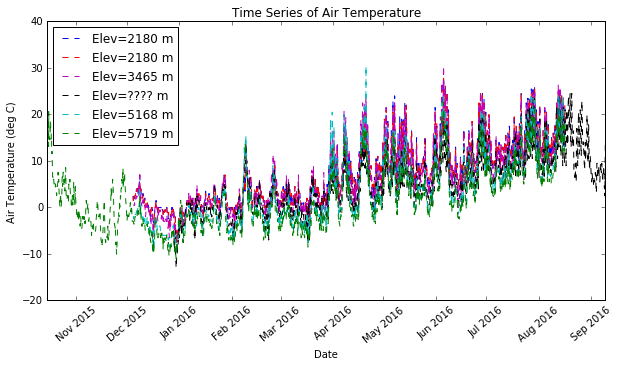

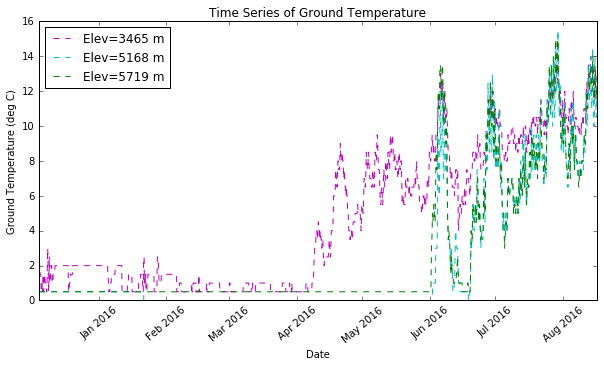

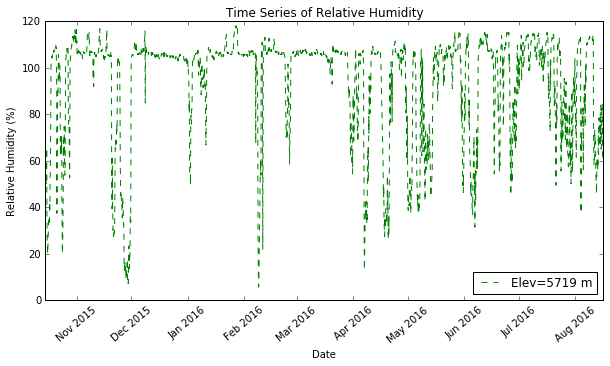

In [6]:
# Create a figure, specifiying figure size
fig1, ax1=plt.subplots(1,1,figsize=(10, 5))
# Plot data and specify label of each line (for legend)
plt.plot(datetime_Lapse2,temp_Lapse2,'b--',label='Elev=2180 m')
plt.plot(datetime_Lapse3,temp_Lapse3,'r--',label='Elev=2180 m')
plt.plot(datetime_Lapse4,temp_Lapse4,'m--',label='Elev=3465 m')
plt.plot(datetime_Lapse5,temp_Lapse5,'k--',label='Elev=???? m')
plt.plot(datetime_Lapse6,temp_Lapse6,'c--',label='Elev=5168 m')
plt.plot(datetime_Lapse7,temp_Lapse7,'g--',label='Elev=5719 m')
# Set axes and figure titles
plt.title('Time Series of Air Temperature')
plt.xlabel('Date')
plt.xticks(rotation=40) # Rotate axis tick values as necessary
plt.ylabel('Air Temperature (deg C)')
# display a legend and specify the location (either 'best' or a value 1-10)
plt.legend(loc='best')

fig2, ax2=plt.subplots(1,1,figsize=(10, 5))
plt.plot(datetime_Lapse4_ground,temp_Lapse4_ground,'m--',label='Elev=3465 m')
plt.plot(datetime_Lapse6_ground,temp_Lapse6_ground,'c--',label='Elev=5168 m')
plt.plot(datetime_Lapse7_ground,temp_Lapse7_ground,'g--',label='Elev=5719 m')
plt.title('Time Series of Ground Temperature')
plt.xlabel('Date')
plt.xticks(rotation=40)
plt.ylabel('Ground Temperature (deg C)')
plt.legend(loc='best')

fig3, ax3=plt.subplots(1,1,figsize=(10, 5))
plt.plot(datetime_Lapse7_RH,temp_Lapse7_RH,'g--',label='Elev=5719 m')
plt.title('Time Series of Relative Humidity')
plt.xlabel('Date')
plt.xticks(rotation=40)
plt.ylabel('Relative Humidity (%)')
plt.legend(loc='best')